In [1]:
import os
import glob
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import json
plt.rcParams['figure.dpi'] = 300

In [2]:
main_path = "performance_comparisons/out/"
directories = [
    "nac-10kb_neuron", "nac-5kb_lung", "nac_offlist-5kb_jejunum", 
    "standard-20kb_PBMC", "standard_offlist-10kb_neuron", "standard_offlist-5kb_lung",
    "nac-20kb_PBMC", "nac_offlist-10kb_neuron", "nac_offlist-5kb_lung",
    "standard-5kb_jejunum", "standard_offlist-20kb_PBMC", "nac-5kb_jejunum",
    "nac_offlist-20kb_PBMC", "standard-10kb_neuron", "standard-5kb_lung",
    "standard_offlist-5kb_jejunum", "nac-mouse_ffpe", "nac_offlist-mouse_ffpe",
    "standard-mouse_ffpe", "standard_offlist-mouse_ffpe"
]


In [3]:
# Initialize data structures
data = {}

# Load the JSON files and extract p_pseudoaligned values
for directory in directories:
    sample = directory.split('-')[1]
    if sample not in data:
        data[sample] = {"standard": None, "standard_offlist": None, "nac": None, "nac_offlist": None}
    
    json_path = os.path.join(main_path, directory, "run_info.json")
    with open(json_path, 'r') as file:
        run_info = json.load(file)
        p_pseudoaligned = run_info['p_pseudoaligned']
    
    if directory.startswith("standard_offlist"):
        data[sample]["standard_offlist"] = p_pseudoaligned
    elif directory.startswith("standard"):
        data[sample]["standard"] = p_pseudoaligned
    elif directory.startswith("nac_offlist"):
        data[sample]["nac_offlist"] = p_pseudoaligned
    elif directory.startswith("nac"):
        data[sample]["nac"] = p_pseudoaligned



In [4]:
data

{'10kb_neuron': {'standard': 65.2,
  'standard_offlist': 62.5,
  'nac': 83.9,
  'nac_offlist': 83.2},
 '5kb_lung': {'standard': 34.8,
  'standard_offlist': 31.7,
  'nac': 74.0,
  'nac_offlist': 73.4},
 '5kb_jejunum': {'standard': 39.5,
  'standard_offlist': 27.8,
  'nac': 70.1,
  'nac_offlist': 63.9},
 '20kb_PBMC': {'standard': 52.8,
  'standard_offlist': 48.7,
  'nac': 78.0,
  'nac_offlist': 76.5},
 'mouse_ffpe': {'standard': 2.2,
  'standard_offlist': 2.1,
  'nac': 5.7,
  'nac_offlist': 5.5}}

In [5]:
# Prepare data for plotting
standard_samples = []
nac_samples = []
standard_diff = []
standard_offlist = []
nac_diff = []
nac_offlist = []

for sample, values in data.items():
    if values["standard"] is not None and values["standard_offlist"] is not None:
        standard_samples.append(sample)
        standard_diff.append(values["standard"] - values["standard_offlist"])
        standard_offlist.append(values["standard_offlist"])
    
    if values["nac"] is not None and values["nac_offlist"] is not None:
        nac_samples.append(sample)
        nac_diff.append(values["nac"] - values["nac_offlist"])
        nac_offlist.append(values["nac_offlist"])


In [6]:
standard_dict = {sample: (diff, offlist) for sample, diff, offlist in zip(standard_samples, standard_diff, standard_offlist)}
nac_dict = {sample: (diff, offlist) for sample, diff, offlist in zip(nac_samples, nac_diff, nac_offlist)}

In [7]:
standard_dict

{'10kb_neuron': (2.700000000000003, 62.5),
 '5kb_lung': (3.099999999999998, 31.7),
 '5kb_jejunum': (11.7, 27.8),
 '20kb_PBMC': (4.099999999999994, 48.7),
 'mouse_ffpe': (0.10000000000000009, 2.1)}

In [8]:
nac_dict

{'10kb_neuron': (0.7000000000000028, 83.2),
 '5kb_lung': (0.5999999999999943, 73.4),
 '5kb_jejunum': (6.199999999999996, 63.9),
 '20kb_PBMC': (1.5, 76.5),
 'mouse_ffpe': (0.20000000000000018, 5.5)}

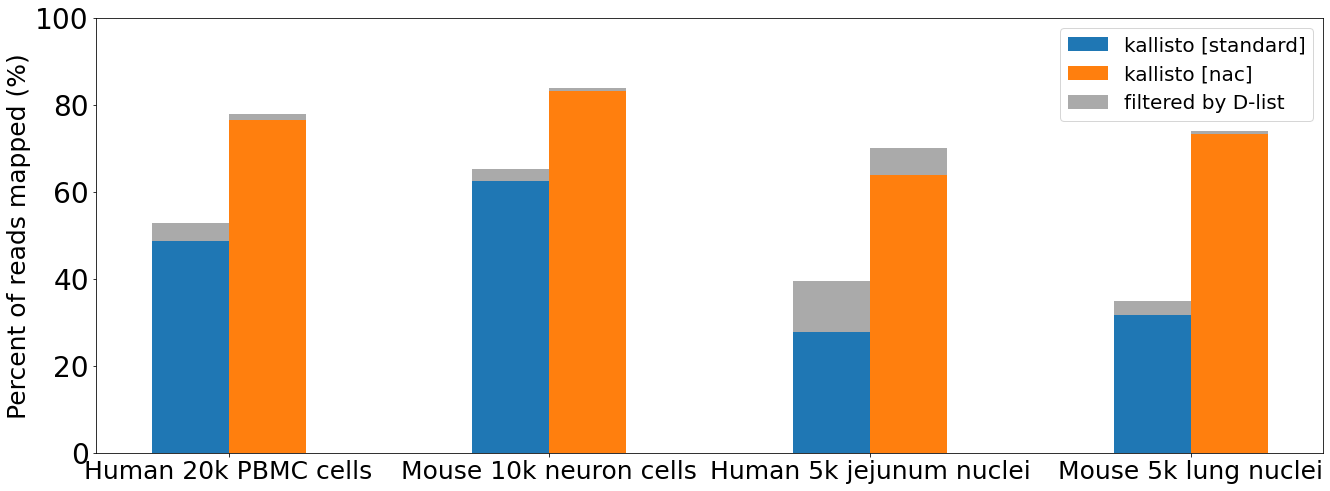

In [9]:
# Define the data
standard_values = [
    standard_dict['20kb_PBMC'][1], standard_dict['10kb_neuron'][1],
    standard_dict['5kb_jejunum'][1], standard_dict['5kb_lung'][1]
]
nac_values = [
    nac_dict['20kb_PBMC'][1], nac_dict['10kb_neuron'][1],
    nac_dict['5kb_jejunum'][1], nac_dict['5kb_lung'][1]
]

standard_diff = [
    standard_dict['20kb_PBMC'][0], standard_dict['10kb_neuron'][0],
    standard_dict['5kb_jejunum'][0], standard_dict['5kb_lung'][0]
]
nac_diff = [
    nac_dict['20kb_PBMC'][0], nac_dict['10kb_neuron'][0],
    nac_dict['5kb_jejunum'][0], nac_dict['5kb_lung'][0]
]

# Define labels and positions for the bars
labels = ['Human 20k PBMC cells', 'Mouse 10k neuron cells', 'Human 5k jejunum nuclei', 'Mouse 5k lung nuclei']
x = np.arange(len(labels))  # label locations
width = 0.24  # width of the bars

# Plotting the data
fig, ax = plt.subplots(figsize=(22, 8))

# Plot standard bars
rects1 = ax.bar(x - width/2, standard_values, width, label='Standard Offlist', color='#1f77b4')
ax.bar(x - width/2, standard_diff, width, bottom=standard_values, color='#AAAAAA', label='Standard Difference')

# Plot nac bars
rects2 = ax.bar(x + width/2, nac_values, width, label='NAC Offlist', color='#ff7f0e')
ax.bar(x + width/2, nac_diff, width, bottom=nac_values, color='#AAAAAA', label='NAC Difference')

# Adding labels and legend
ax.set_ylabel('Percent of reads mapped (%)', fontsize=25)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=25)
ax.legend(loc='upper right')
plt.ylim(0, 100)
plt.legend(['Standard Offlist', None, 'Nac Offlist'])
plt.yticks(fontsize=28)

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,2,1]
plt.legend([handles[idx] for idx in order],['kallisto [standard]', 'kallisto [nac]', 'filtered by D-list'], fontsize=20)



plt.show()


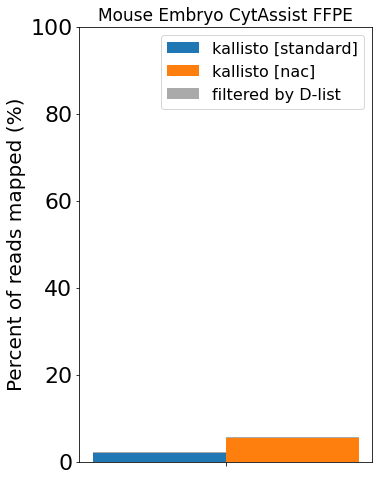

In [10]:
# Define the data
standard_values = [
    standard_dict['mouse_ffpe'][1]
]
nac_values = [
    nac_dict['mouse_ffpe'][1]
]

standard_diff = [
    standard_dict['mouse_ffpe'][0]
]
nac_diff = [
    nac_dict['mouse_ffpe'][0]
]

# Define labels and positions for the bars
labels = [None]
x = np.arange(len(labels))  # label locations
width = 0.001  # width of the bars

# Plotting the data
fig, ax = plt.subplots(figsize=(5.25, 8))

# Plot standard bars
rects1 = ax.bar(x - width/2, standard_values, width, label='Standard Offlist', color='#1f77b4')
ax.bar(x - width/2, standard_diff, width, bottom=standard_values, color='#AAAAAA', label='Standard Difference')

# Plot nac bars
rects2 = ax.bar(x + width/2, nac_values, width, label='NAC Offlist', color='#ff7f0e')
ax.bar(x + width/2, nac_diff, width, bottom=nac_values, color='#AAAAAA', label='NAC Difference')

# Adding labels and legend
ax.set_ylabel('Percent of reads mapped (%)', fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=20)
ax.legend(loc='upper right')
plt.ylim(0, 100)
plt.legend(['Standard Offlist', None, 'Nac Offlist'])
plt.yticks(fontsize=22)
plt.title("Mouse Embryo CytAssist FFPE", fontsize=17)

handles, labels = plt.gca().get_legend_handles_labels()
order = [0,2,1]
plt.legend([handles[idx] for idx in order],['kallisto [standard]', 'kallisto [nac]', 'filtered by D-list'], fontsize=16)



plt.show()
